### Codificación de etiquetas

Echemos un vistazo a una nueva técnica de codificación de características para árboles de decisión y bosques aleatorios.
El árbol de decisión hace preguntas a los nodos, así que tal vez no necesite ningún tipo de codificación y pueda trabajar con características categóricas directamente.

Así es como se ve como un diagrama:

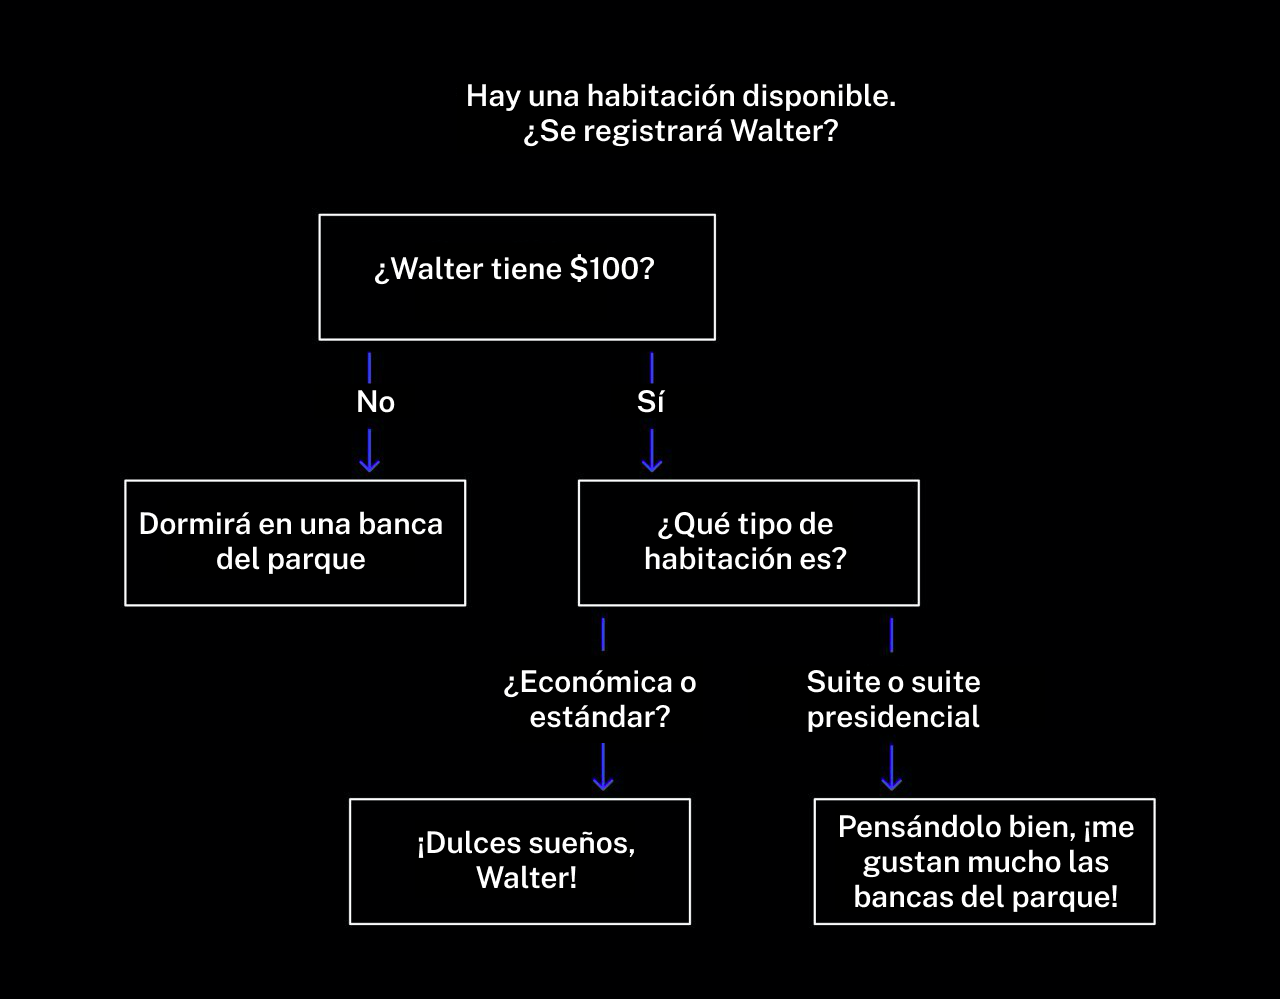


Intentamos entrenar el modelo:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('travel_insurance_us.csv')
target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.25, random_state=12345)

tree = DecisionTreeClassifier(random_state=12345)
tree.fit(features_train, target_train)

#output: ...

#ValueError: could not convert string to float: 'EPX'

Hay otro error. Esta vez no fue causado por el modelo subyacente en sí mismo que exige solo valores numéricos, sino por cómo se implementan los árboles en la librería sklearn. Algunas otras plataformas de machine learning, como R o H2O, pueden aprovechar los datos categóricos sin procesar. Desafortunadamente, en este momento, sklearn no es compatible con esta característica y requiere codificación.

Entonces, ¿se supone que debemos usar OHE para los árboles de decisión también? Esta podría ser una opción viable, pero no es la mejor por varias razones. La razón principal es que, a diferencia de los modelos de regresión que tienen acceso a todo el espectro de variables al mismo tiempo, el modelo basado en árboles solo puede procesar una variable a la vez. Como resultado, no tiene información completa sobre la variable categórica original. En cambio, su importancia se dispersa entre muchas variables dummy, por lo que estas variables dummy casi nunca se eligen como variables de división cerca de la raíz del árbol, incluso si fueran un buen predictor.

Parece que necesitamos una nueva técnica de codificación, una que mantenga toda la información sobre la variable original en una característica. La solución obvia es simplemente reemplazar las categorías con etiquetas numéricas arbitrarias: codificación de etiquetas (label encoding).

Esta técnica se utiliza para codificar características categóricas para árboles de decisión y otros algoritmos basados en árboles, como bosques aleatorios.

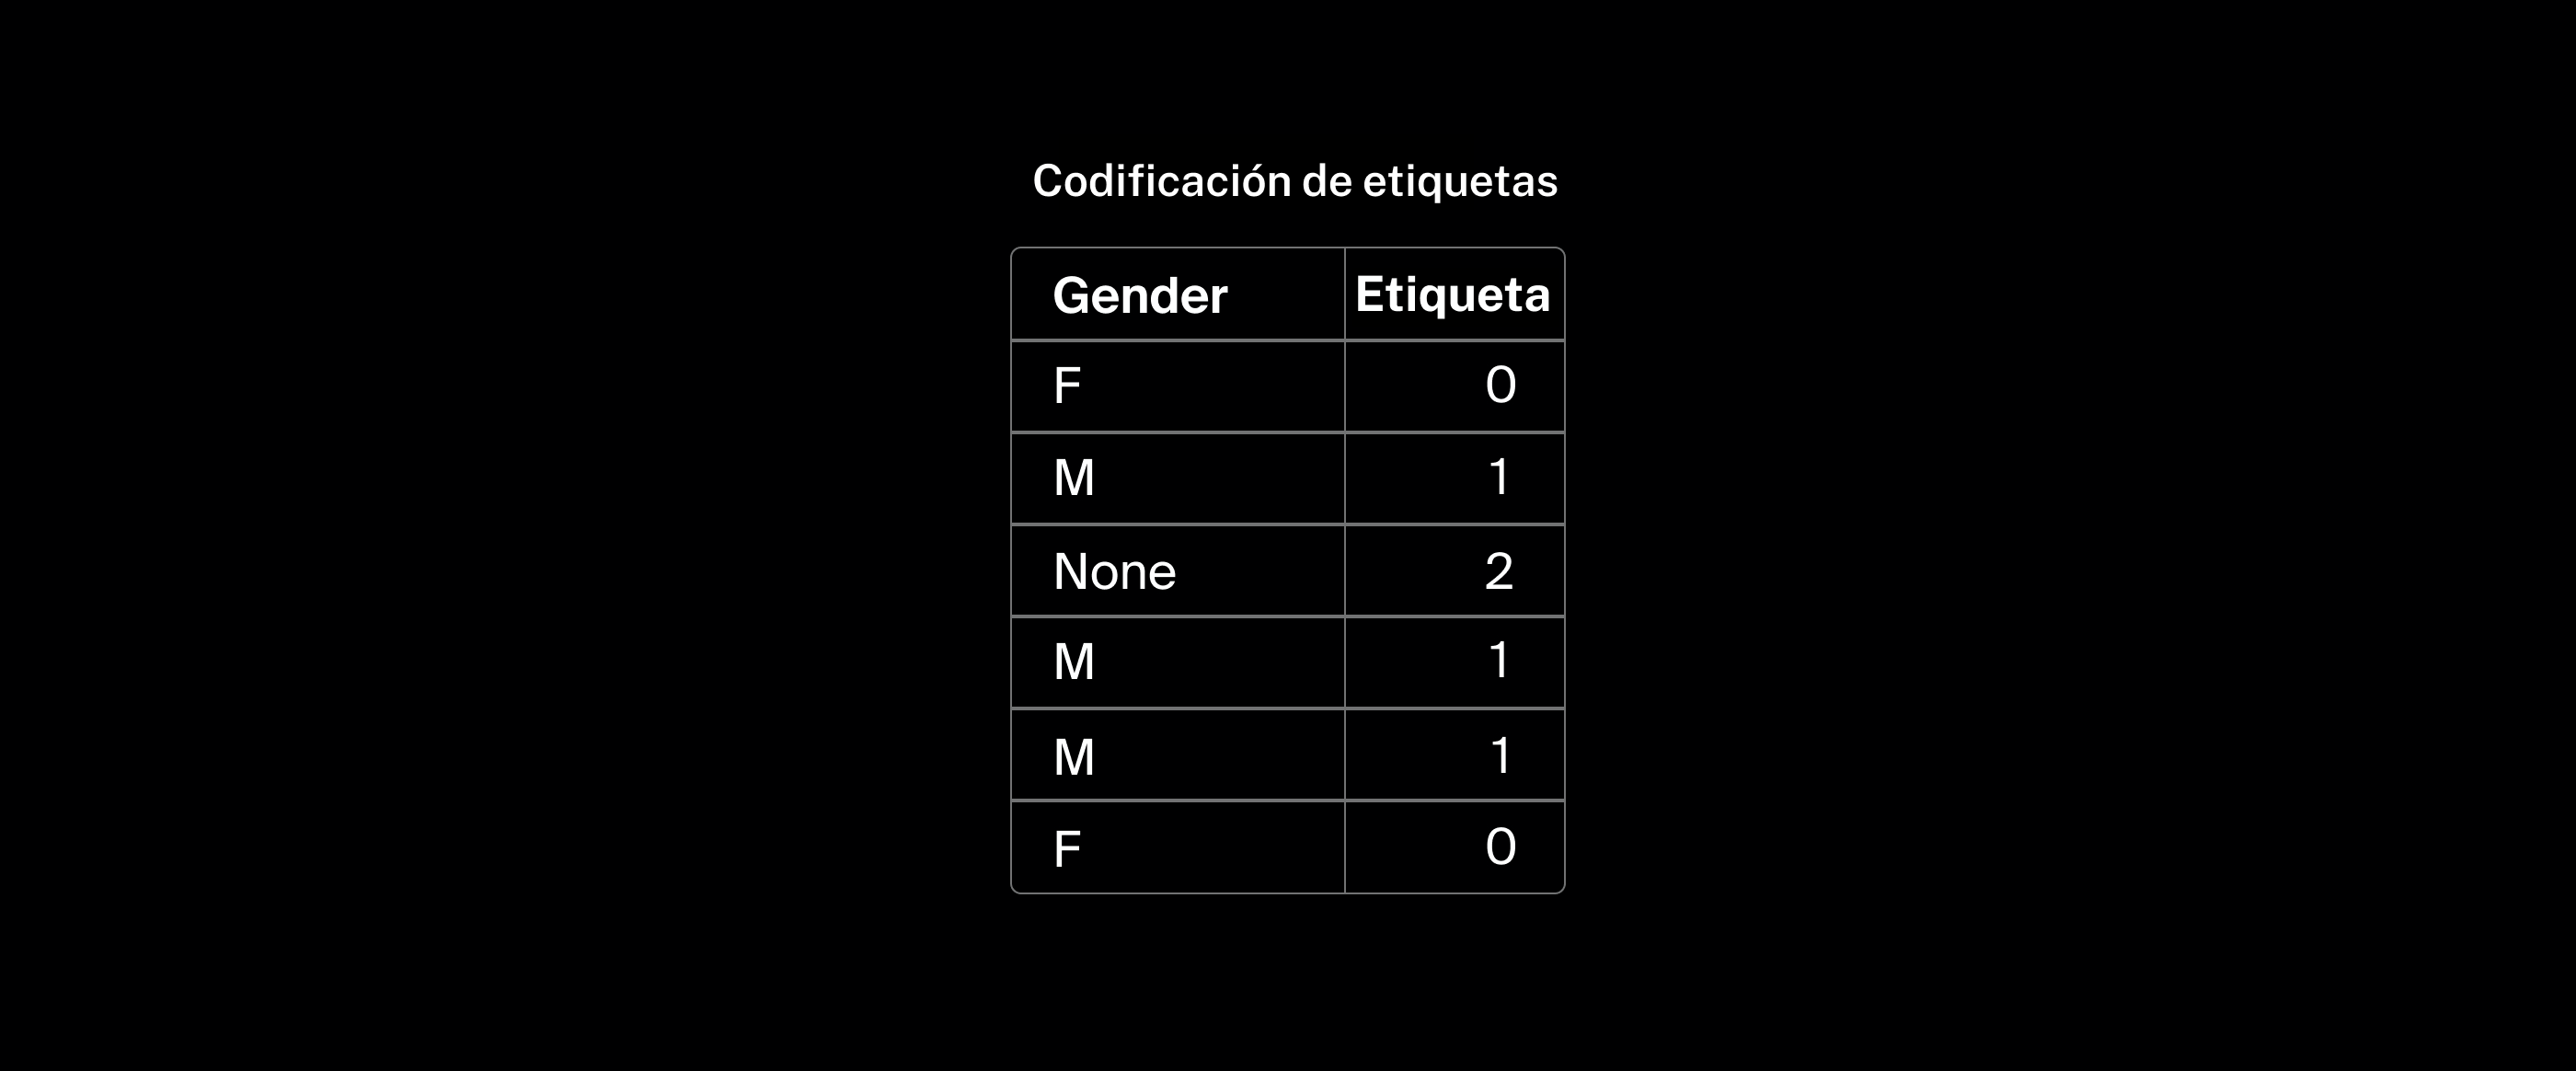



Sklearn proporciona dos clases para la codificación de etiquetas y ambas se encuentran en el módulo sklearn.preprocessing. La clase LabelEncoder se usa para codificar una sola columna, mientras que la clase OrdinalEncoder se usa para dos o más columnas a la vez, hasta el conjunto de datos completo. Esta es la principal diferencia entre ellas y, por lo demás, funcionan prácticamente de la misma manera, asignando números a categorías en orden alfabético (las etiquetas numéricas exactas asignadas no importan y también podrían ser aleatorias, por lo que el orden alfabético es un enfoque aceptable).

Es importante tener en cuenta que actualmente existe cierta confusión en la comunidad de Data Science con respecto a la terminología de esta codificación. Dado que la clase OrdinalEncoder de la librería sklearn generalmente se usa para fines de codificación de etiquetas, es posible que encuentres fuentes que la llamen Сodificación Ordinal. Sin embargo, estrictamente hablando, la codificación ordinal es un tipo diferente de codificación que trataremos por separado en la siguiente lección.

En aras de la simplicidad, solo consideraremos el uso de OrdinalEncoder en todo el conjunto de datos y solo para fines de codificación de etiquetas.

Importa OrdinalEncoder de la librería:

from sklearn.preprocessing import OrdinalEncoder

La transformación se realiza en tres pasos:

1. Crea una instancia de esta clase.

encoder = OrdinalEncoder()

2. Antes de usar el codificador, debes ajustarlo a tus datos para que reconozca qué variables son categóricas. Para hacerlo, llama al método fit() y pásale los datos (de la misma manera que lo hacemos cuando entrenamos un modelo).

encoder.fit(data)

3. Utiliza el método transform(). Los datos transformados se almacenarán en la variable data_ordinal .

data_ordinal = encoder.transform(data)

Usa el constructor DataFrame() para agregar nombres de columna:

data_ordinal = pd.DataFrame(encoder.transform(data),columns=data.columns)

Si necesitas transformar los datos solo una vez, como en nuestro caso, puedes llamar al método fit_transform() en su lugar.  Este combina fit() y transform().

data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

#### Ejercicio

1. Transforma las funciones utilizando codificación de etiquetas. Importa OrdinalEncoder desde el módulo sklearn.preprocessing.

Almacena el resultado en la variable data_ordinal. Utiliza el constructor DataFrame().

Muestra en pantalla las primeras cinco filas (en precódigo).

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder# < escribe el código aquí  >

data = pd.read_csv('/datasets/travel_insurance_us.csv')

# < escribe el código aquí  >
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

print(data_ordinal.head())

"""   Agency  Agency Type  ...  Gender   Age
0     9.0          0.0  ...     1.0  37.0
1     7.0          1.0  ...     2.0  34.0
2     7.0          1.0  ...     2.0  34.0
3     7.0          1.0  ...     2.0  34.0
4     9.0          0.0  ...     1.0  32.0

[5 rows x 11 columns]"""

#### Ejercicio

2. Utiliza los datos transformados para entrenar un árbol de decisión. Muestra en pantalla el texto "¡Entrenado!" (en precódigo) para asegurarte de que el código completó su ejecución.

Crea un modelo DecisionTreeClassifier, pásalo a random_state=12345.

Entrena al modelo con fit ().

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('/datasets/travel_insurance_us.csv')

encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

target = data_ordinal['Claim']
features = data_ordinal.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Aqui va tu codigo
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

print('¡Entrenado!')

# Output: ¡Entrenado!
